<a href="https://colab.research.google.com/github/felayani/face-recognition/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

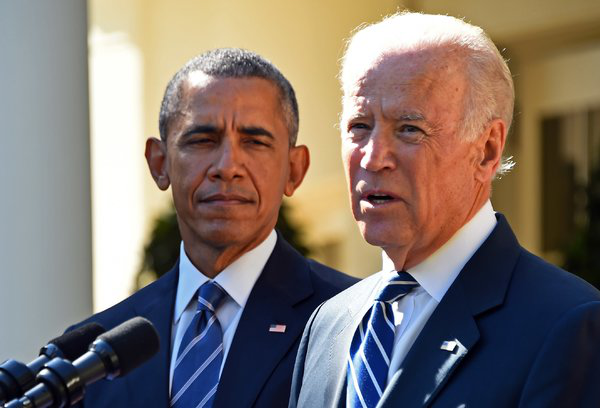

In [0]:
from PIL import Image, ImageDraw
from IPython.display import display
import requests

# The program we will be finding faces on the example below
url = 'https://static01.nyt.com/images/2015/10/23/fashion/23OTR-A/23OTR-A-articleLarge.jpg'
response = requests.get(url, stream = True)
pil_im = Image.open(response.raw)
display(pil_im)

In [0]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 106kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=07f3eec8ea82bc5d2a45ce585d709285b282020597735081edf5d22245dc85ba
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
url1 = 'https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg'
response = requests.get(url1, stream = True)

obama_image = face_recognition.load_image_file(response.raw)
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

url2 = 'https://timedotcom.files.wordpress.com/2019/09/joe-biden-ukraine-fundraising.jpg'
response = requests.get(url2, stream = True)

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file(response.raw)
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


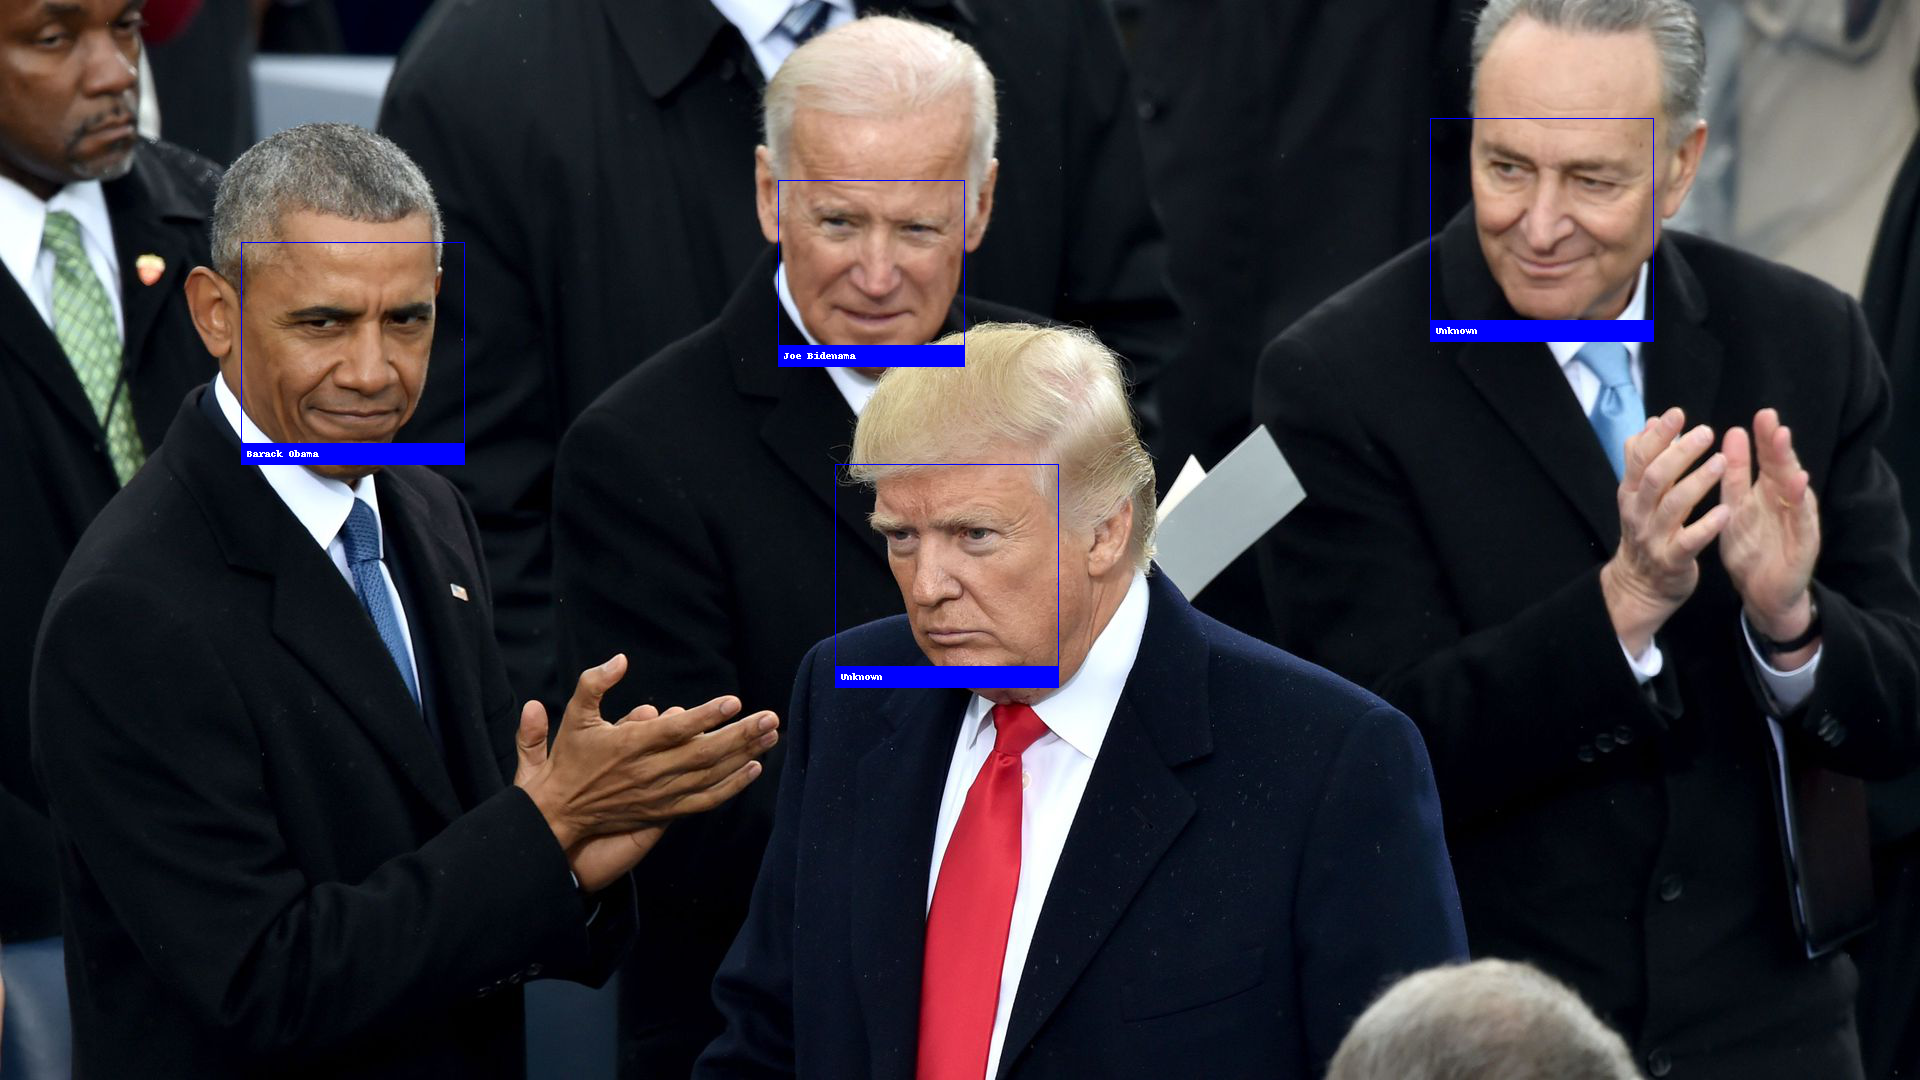

In [0]:
# Load an image with an unknown face
url = 'https://images.axios.com/8c4qYshzN0lvj60Y4lwgi-zwaP8=/0x173:3956x2398/1920x1080/2018/02/07/1517968795592.jpg'
response = requests.get(url, stream = True)
unknown_image = face_recognition.load_image_file(response.raw)

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)